In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
with open('data/names.txt', 'r') as f:
    words = f.read().splitlines()

In [7]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
len(words)

32033

In [13]:
chars = sorted(list(set(''.join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [20]:
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [21]:
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [30]:
# build the dataset

block_size = 3 # context length
X, Y = [], []
for w in words[:5]:
    print(w)
    # Лист болванка из 0 для дальнейшего заполнения
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
        # Индекс символа в словаре
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        print(''.join(itos[i] for i in context), '------>', itos[ix])
        # Убрали первый символ, добавили новый
        context = context[1:] + [ix] # crop and append
        # print(context)

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ------> e
..e ------> m
.em ------> m
emm ------> a
mma ------> .
olivia
... ------> o
..o ------> l
.ol ------> i
oli ------> v
liv ------> i
ivi ------> a
via ------> .
ava
... ------> a
..a ------> v
.av ------> a
ava ------> .
isabella
... ------> i
..i ------> s
.is ------> a
isa ------> b
sab ------> e
abe ------> l
bel ------> l
ell ------> a
lla ------> .
sophia
... ------> s
..s ------> o
.so ------> p
sop ------> h
oph ------> i
phi ------> a
hia ------> .


In [31]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [33]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [36]:
# EmbeddingTable
C = torch.randn((27, 2))
C

tensor([[ 8.0508e-02, -1.6898e+00],
        [-3.5249e-01, -3.0746e-01],
        [-3.2899e-01,  8.0067e-01],
        [ 2.7891e-01,  9.9546e-01],
        [-9.9209e-01,  9.5709e-01],
        [ 5.7369e-01,  6.4169e-04],
        [-9.0910e-01, -9.7777e-01],
        [ 4.8445e-01,  1.1573e+00],
        [-5.9675e-01,  3.3683e-01],
        [-2.3586e-02, -9.7012e-01],
        [-2.0983e-02,  1.9103e-01],
        [ 5.2860e-01,  7.2298e-01],
        [-2.6467e-01, -8.0097e-01],
        [ 7.3363e-01,  5.3975e-01],
        [-9.4607e-01,  2.2937e+00],
        [ 8.7173e-02,  6.0612e-01],
        [ 1.0296e-01, -8.6062e-01],
        [ 8.1925e-01, -5.1951e-01],
        [ 2.0965e+00,  3.4707e-01],
        [-1.7176e-02,  1.7585e+00],
        [ 6.6471e-01, -1.3982e+00],
        [-7.3184e-01, -9.2574e-01],
        [-4.0589e-01, -2.0288e-01],
        [ 2.3889e-01,  1.1156e+00],
        [-4.2205e-01, -2.9485e-01],
        [-7.6240e-01,  8.0894e-01],
        [ 1.8975e+00,  9.4972e-02]])

In [40]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [44]:
C[5]

tensor([0.5737, 0.0006])

In [43]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.5737, 0.0006])

In [45]:
C[[5, 6, 7]]

tensor([[ 5.7369e-01,  6.4169e-04],
        [-9.0910e-01, -9.7777e-01],
        [ 4.8445e-01,  1.1573e+00]])

In [47]:
C[torch.tensor([5, 6, 7])]

tensor([[ 5.7369e-01,  6.4169e-04],
        [-9.0910e-01, -9.7777e-01],
        [ 4.8445e-01,  1.1573e+00]])

In [48]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[ 5.7369e-01,  6.4169e-04],
        [-9.0910e-01, -9.7777e-01],
        [ 4.8445e-01,  1.1573e+00],
        [ 4.8445e-01,  1.1573e+00],
        [ 4.8445e-01,  1.1573e+00],
        [ 4.8445e-01,  1.1573e+00]])

In [52]:
X.shape

torch.Size([32, 3])

In [50]:
C[X].shape

torch.Size([32, 3, 2])

In [54]:
X[13, 2]

tensor(1)

In [56]:
C[X][13, 2]

tensor([-0.3525, -0.3075])

In [57]:
C[1]

tensor([-0.3525, -0.3075])

In [59]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [62]:
# 100 - кол-во нейронов
# 6 потому что передаем по 2 эмбеддинга для каждого из 3 символов контекста
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [63]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [64]:
emb.shape

torch.Size([32, 3, 2])

In [67]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([32, 2]), torch.Size([32, 2]), torch.Size([32, 2]))

Как он пришел к тому в каком направлении матрицы необходимо стакнуть?

In [70]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

https://docs.pytorch.org/docs/stable/generated/torch.cat.html

https://docs.pytorch.org/docs/stable/generated/torch.unbind.html

Вариант на произвольное кол-во измерений, unbind расцепляет по указанному измерению на лист тензоров, и потом их все можно скрепить через cat

In [75]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [77]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [78]:
a.shape

torch.Size([18])

In [79]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [80]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

Любой тензор в памяти хранится как одномерная последовательность, через .view можно его увидеть в любой размерности

In [81]:
a.storage()

/var/folders/zs/lr774nl56f317p1kp7zdfxjc0000gn/T/ipykernel_93523/2905276573.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [82]:
emb.shape

torch.Size([32, 3, 2])

In [83]:
emb.view(32, 6)

tensor([[ 8.0508e-02, -1.6898e+00,  8.0508e-02, -1.6898e+00,  8.0508e-02,
         -1.6898e+00],
        [ 8.0508e-02, -1.6898e+00,  8.0508e-02, -1.6898e+00,  5.7369e-01,
          6.4169e-04],
        [ 8.0508e-02, -1.6898e+00,  5.7369e-01,  6.4169e-04,  7.3363e-01,
          5.3975e-01],
        [ 5.7369e-01,  6.4169e-04,  7.3363e-01,  5.3975e-01,  7.3363e-01,
          5.3975e-01],
        [ 7.3363e-01,  5.3975e-01,  7.3363e-01,  5.3975e-01, -3.5249e-01,
         -3.0746e-01],
        [ 8.0508e-02, -1.6898e+00,  8.0508e-02, -1.6898e+00,  8.0508e-02,
         -1.6898e+00],
        [ 8.0508e-02, -1.6898e+00,  8.0508e-02, -1.6898e+00,  8.7173e-02,
          6.0612e-01],
        [ 8.0508e-02, -1.6898e+00,  8.7173e-02,  6.0612e-01, -2.6467e-01,
         -8.0097e-01],
        [ 8.7173e-02,  6.0612e-01, -2.6467e-01, -8.0097e-01, -2.3586e-02,
         -9.7012e-01],
        [-2.6467e-01, -8.0097e-01, -2.3586e-02, -9.7012e-01, -4.0589e-01,
         -2.0288e-01],
        [-2.3586e-02, -9.7012e

In [88]:
torch.cat(torch.unbind(emb, 1), 1) == emb.view(32, 6)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [93]:
# Если указно -1, pytorch сам вычислит какая размерность должна быть
# h = emb.view(32, 6) @ W1
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[ 0.9671,  0.9966, -0.9683,  ...,  0.9969, -0.9437, -0.9540],
        [ 0.9795,  0.9927,  0.9540,  ...,  0.9998, -0.9991, -0.9920],
        [ 0.9156,  0.8417,  0.7240,  ...,  0.9979, -0.9987, -0.9973],
        ...,
        [ 0.6387,  0.1974,  0.8840,  ..., -0.6650, -0.9968, -0.2873],
        [-0.1354,  0.6125, -0.9958,  ..., -0.6789, -0.9597, -0.8871],
        [ 0.4965,  0.7461,  0.7769,  ..., -0.6663, -0.9659, -0.4785]])

cat и unbind под капотом создают новые tensor и занимают память, поэтому лучше использовать view

In [94]:
h.shape

torch.Size([32, 100])

In [95]:
(emb.view(-1, 6) @ W1 + b1).shape

torch.Size([32, 100])

In [96]:
b1.shape

torch.Size([100])

In [ ]:
# Обязательно проверять, что broadcastring каботает как надо
# 32 100
# 1  100

In [98]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [99]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [101]:
counts = logits.exp()
counts

tensor([[2.2046e-04, 2.9931e+02, 2.2720e+04, 3.7396e+02, 1.2800e-10, 3.8696e-07,
         6.5192e+04, 5.4077e+03, 3.7054e+01, 6.1020e+02, 1.2648e+01, 2.3056e+00,
         2.9109e-02, 1.3985e-02, 8.5290e-06, 1.1494e-02, 3.8679e-06, 7.4920e+05,
         1.7043e-04, 3.9952e-02, 3.6468e+01, 2.3344e-04, 3.2143e-03, 3.6390e-05,
         3.5039e-01, 3.3589e-01, 4.0600e-01],
        [8.0161e-01, 5.6956e+06, 3.0878e+06, 1.0982e+02, 7.8521e-10, 1.5831e-07,
         1.0085e-01, 7.4160e+01, 1.2489e+01, 8.4145e+01, 3.8688e+00, 5.6043e-03,
         1.0777e-01, 2.0845e-02, 3.6447e-03, 4.7857e+01, 5.8418e-05, 1.1843e+06,
         5.1751e+00, 7.2866e+02, 1.5970e-04, 1.1946e+02, 1.9955e-04, 2.3779e-02,
         4.7884e+01, 1.7684e+00, 1.2422e+01],
        [9.0983e-02, 1.1066e+04, 1.1360e+03, 1.3363e-05, 6.3616e-07, 1.0095e-08,
         1.6387e+00, 6.1083e-01, 3.3987e-02, 5.2976e-05, 7.2303e+04, 1.8982e-02,
         6.9215e+00, 1.6805e+00, 6.2451e+02, 1.5092e+07, 4.4261e-04, 1.0472e+03,
         8.3663e-

In [108]:
prob = counts / counts.sum(1, keepdim=True)
prob

tensor([[2.6124e-10, 3.5467e-04, 2.6923e-02, 4.4314e-04, 1.5168e-16, 4.5855e-13,
         7.7251e-02, 6.4081e-03, 4.3908e-05, 7.2309e-04, 1.4988e-05, 2.7321e-06,
         3.4494e-08, 1.6572e-08, 1.0107e-11, 1.3620e-08, 4.5835e-12, 8.8779e-01,
         2.0196e-10, 4.7342e-08, 4.3215e-05, 2.7662e-10, 3.8090e-09, 4.3122e-11,
         4.1520e-07, 3.9802e-07, 4.8110e-07],
        [8.0411e-08, 5.7134e-01, 3.0974e-01, 1.1016e-05, 7.8766e-17, 1.5881e-14,
         1.0116e-08, 7.4392e-06, 1.2528e-06, 8.4408e-06, 3.8809e-07, 5.6218e-10,
         1.0810e-08, 2.0910e-09, 3.6560e-10, 4.8007e-06, 5.8601e-12, 1.1880e-01,
         5.1913e-07, 7.3094e-05, 1.6020e-11, 1.1983e-05, 2.0017e-11, 2.3854e-09,
         4.8034e-06, 1.7739e-07, 1.2460e-06],
        [5.9939e-09, 7.2901e-04, 7.4838e-05, 8.8032e-13, 4.1910e-14, 6.6506e-16,
         1.0796e-07, 4.0241e-08, 2.2390e-09, 3.4900e-12, 4.7633e-03, 1.2505e-09,
         4.5599e-07, 1.1071e-07, 4.1142e-05, 9.9427e-01, 2.9159e-11, 6.8987e-05,
         5.5117e-

In [109]:
prob.shape

torch.Size([32, 27])

In [110]:
prob.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

Кол-во ответов которое надо дать

In [111]:
prob[torch.arange(32), Y]

tensor([4.5855e-13, 2.0910e-09, 1.1071e-07, 5.3282e-05, 1.7788e-10, 1.3620e-08,
        8.7753e-09, 9.3328e-11, 3.8540e-07, 1.0982e-09, 2.2953e-05, 1.0660e-09,
        3.5467e-04, 3.6620e-11, 4.7291e-05, 9.2334e-06, 7.2309e-04, 4.4206e-08,
        6.7556e-01, 3.7165e-05, 9.9727e-01, 2.7510e-05, 3.6662e-02, 1.4149e-05,
        1.4770e-08, 4.7342e-08, 2.6115e-08, 1.3518e-12, 4.8638e-11, 2.5490e-12,
        6.3423e-07, 1.9707e-10])

In [112]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.7253)

### Переписано в чистый вид

In [113]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [116]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [117]:
sum(p.nelement() for p in parameters)

3481

In [118]:
# Forward pass
emb = C[X] # 32 2 3
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.7105)

In [119]:
F.cross_entropy(logits, Y)

tensor(19.7105)

In [122]:
for p in parameters:
    p.requires_grad = True

In [124]:
losses = []
for _ in range(100):
    # Forward pass
    emb = C[X] # 32 2 3
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    losses.append(loss.item())
    print(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

0.28331857919692993
0.2829377055168152
0.2825660705566406
0.2822033762931824
0.28184935450553894
0.2815036475658417
0.2811658978462219
0.28083598613739014
0.2805134654045105
0.28019818663597107
0.27988988161087036
0.2795883119106293
0.2792932689189911
0.27900445461273193
0.27872174978256226
0.2784450054168701
0.2781740427017212
0.2779085040092468
0.277648389339447
0.2773934304714203
0.27714356780052185
0.2768985331058502
0.276658296585083
0.27642276883125305
0.2761916220188141
0.2759648263454437
0.2757422626018524
0.2755237817764282
0.27530932426452637
0.2750988006591797
0.2748919725418091
0.27468886971473694
0.2744893431663513
0.2742932438850403
0.27410054206848145
0.27391117811203003
0.2737250030040741
0.27354201674461365
0.27336207032203674
0.2731850743293762
0.27301090955734253
0.2728397250175476
0.2726712226867676
0.27250537276268005
0.2723422348499298
0.2721816301345825
0.2720235288143158
0.27186787128448486
0.27171456813812256
0.27156367897987366
0.27141499519348145
0.2712686061

### Считаю на весь датасет

In [125]:
# build the dataset

block_size = 3 # context length
X, Y = [], []
for w in words:
    # print(w)
    # Лист болванка из 0 для дальнейшего заполнения
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
        # Индекс символа в словаре
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        # print(''.join(itos[i] for i in context), '------>', itos[ix])
        # Убрали первый символ, добавили новый
        context = context[1:] + [ix] # crop and append
        # print(context)

X = torch.tensor(X)
Y = torch.tensor(Y)

In [127]:
X.shape

torch.Size([228146, 3])

In [128]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [129]:
losses = []
for _ in range(100):
    # Forward pass
    emb = C[X] # 32 2 3
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    losses.append(loss.item())
    print(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

17.38480567932129
16.297658920288086
15.413256645202637
14.692699432373047
14.05534839630127
13.460613250732422
12.896123886108398
12.368453979492188
11.880732536315918
11.432650566101074
11.024520874023438
10.65057373046875
10.301085472106934
9.969611167907715
9.653522491455078
9.35224723815918
9.066604614257812
8.798285484313965
8.548834800720215
8.318395614624023
8.10545539855957
7.907682418823242
7.722727298736572
7.548570156097412
7.383606910705566
7.226583003997803
7.076556205749512
6.9328413009643555
6.794936180114746
6.6624650955200195
6.535129547119141
6.412679195404053
6.29489278793335
6.181572437286377
6.0725417137146
5.967641830444336
5.866734027862549
5.7696990966796875
5.676431655883789
5.586844444274902
5.500856876373291
5.418400764465332
5.339409828186035
5.263824462890625
5.191590785980225
5.12265157699585
5.056951522827148
4.994421005249023
4.934976577758789
4.878512382507324
4.82489538192749
4.7739691734313965
4.725553512573242
4.679457664489746
4.635479927062988
4.5

Учимся, но итерации занимают много времени тк каждый раз надо все 220к примеров прогнать, попробуем добавить минибатчи

### Добавляем минибатчи

In [130]:
torch.randint(0, 5, 32)

TypeError: randint() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int high, tuple of ints size, *, torch.Generator generator, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (int high, tuple of ints size, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (int low, int high, tuple of ints size, *, torch.Generator generator, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (int low, int high, tuple of ints size, *, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)


In [131]:
torch.randint(0, 5, (32,))

tensor([4, 3, 1, 3, 3, 3, 0, 0, 3, 1, 3, 2, 1, 2, 3, 1, 3, 4, 4, 1, 2, 2, 2, 3,
        4, 1, 1, 0, 3, 4, 3, 4])

In [134]:
# Семплинг 32 случайных элементов
torch.randint(0, X.shape[0], (32,))

tensor([ 11000, 225912,  74384,  66153,  46145, 117083,  37628,  30251,  79984,
        210141, 183632, 162903, 162167,  61056,  46656, 218242, 176515, 101004,
         87900, 225784, 121523, 211531,  64726, 194311, 171635,  85489, 161167,
        185880,  53738, 120870, 163485, 142922])

In [136]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [150]:
losses = []
for _ in range(1000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.2243499755859375


In [151]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
f'{loss.item():3f}'

'2.511949'

? А разве минибатчи так достаются? Я думал что сначала перемешивается случайно датасет, и потом по нему подряд идем и берем по batch_size семплов каждый раз

### Настройка LR

In [183]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [165]:
import numpy as np

In [177]:
# lre = torch.linspace(0.0001, 1, 1000)
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
x_ax = np.arange(1,1001)

In [187]:
# plt.plot(x_ax, lre)

In [188]:
# plt.plot(x_ax, lrs)

In [195]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [196]:
lri = []
losses = []

for i in range(1000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = lrs[i]
    # lr = lre[i]
    for p in parameters:
        p.data += -lr * p.grad

    # lri.append(lr)
    lri.append(lre[i])
    losses.append(loss.item())

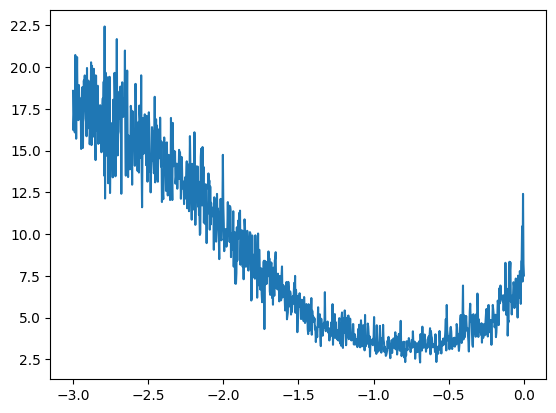

In [197]:
plt.plot(lri, losses)

### Запускаем долгий расчет с хорошим LR

In [ ]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [205]:
lri = []
losses = []

for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = 0.001
    for p in parameters:
        p.data += -lr * p.grad

In [206]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
f'{loss.item():3f}'

'2.239504'